<a href="https://colab.research.google.com/github/NeonRio/fashion_mnist_keras/blob/main/fashion_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is fashion mnist data recognition project using keras

## Lets import dependencies that that we need

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.datasets import fashion_mnist
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Data preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Model creation part
our model will have 2 Conv2D layers and 2 Dense layers

In [ ]:
model = Sequential([
      Conv2D(filters=32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
      MaxPool2D(pool_size=(2,2), strides=2),
      Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
      MaxPool2D(pool_size=(2,2), strides=2),
      Flatten(input_shape=(28,28,1)),
      Dense(units=100,activation='relu'),
      Dense(units=10,activation='softmax'),
])

In [ ]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Model training

In [ ]:
model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 27s 6ms/step - loss: 0.0289 - accuracy: 0.7904 - val_loss: 0.0181 - val_accuracy: 0.8734
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0157 - accuracy: 0.8916 - val_loss: 0.0160 - val_accuracy: 0.8870
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0130 - accuracy: 0.9125 - val_loss: 0.0141 - val_accuracy: 0.9017
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0118 - accuracy: 0.9199 - val_loss: 0.0136 - val_accuracy: 0.9081
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0103 - accuracy: 0.9312 - val_loss: 0.0136 - val_accuracy: 0.9088
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0091 - accuracy: 0.9404 - val_loss: 0.0125 - val_accuracy: 0.9162
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0079 - accuracy: 0.9483 - val_loss: 0.0127 - val_ac

### Efficiency test
We have over 90 percent efficiency. Thats cool.

In [ ]:
test_loss, test_accuracy = model.evaluate(x=x_test,y=y_test,batch_size=10)
test_loss, test_accuracy = test_loss*100, test_accuracy*100
test_loss, test_accuracy = np.round(test_loss,2), np.round(test_accuracy,2)
print("Efficiency: ", test_accuracy , "%")

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0127 - accuracy: 0.9155
Efficiency:  91.55 %


In [ ]:
labels = {
    0: 	"T-shirt/top",
    1: 	"Trouser",
    2: 	"Pullover",
    3: 	"Dress",
    4: 	"Coat",
    5: 	"Sandal",
    6: 	"Shirt",
    7: 	"Sneaker",
    8: 	"Bag",
    9: 	"Ankle boot"
}

In [ ]:
random_fashion = x_test[np.random.randint(0,len(x_test))]

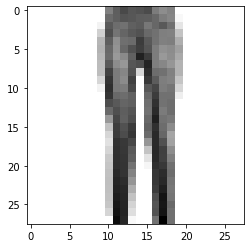

In [ ]:
plt.imshow(random_fashion[:,:,0],cmap="gray_r")

In [ ]:
element = np.array([random_fashion])
labels[np.argmax(model.predict(element))]

'Trouser'

**As we can see our model is working**